# 3.2. Hierarisches_Clustering

>## <ins>Table of contents</ins>
>* [**3.2.1. Clusteranzahl und hierarchisches Clustering**](#3_2_1)
>* [**3.2.2. Single-Link-Clustering**](#3_2_2)
>* [**3.2.3. Divisive Analysis Clusterin**](#3_2_3)

# `Links`
> - https://youtu.be/z2yncM2HE6M?si=x9QWLV4mEHoXBiLS

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



## 3.2.1.  Clusteranzahl und hierarchisches Clustering <a name="3_2_1"></a>

Herausforderung in der Clusteranalyse: Bestimmung der optimalen Anzahl `k` von Clustern für einen gegebenen Datensatz.

Eine Methode, die wir gesehen haben: `die Ellenbogenmethode`. Eine heuristische Methode zur Bestimmung der Clusteranzahl beim K-Means-Algorithmus.

Aber es gibt keine universelle Definition der "richtigen" Anzahl von Clustern, weil diese je nach Anwendung und Datensatz variieren kann (*haben wir in dem Beispiel der Marktsegmentierung gesehen*).

Verschiedene sinnvolle Clusterzahlen: Abhängig vom Anwendungsfall können für denselben Datensatz verschiedene Clusterzahlen sinnvoll sein.


### Beipiel 1: Giftige Tiere
- `Kontext`:

  In diesem Szenario haben wir eine Reihe von Tie $E_{animals} = {x_1,..., x_6}$ren, die durch zwei Merkmale charakterisiert sind: die Anzahl der Beine und den Giftigkeitsgrad (auf einer imaginären Skala von 0 = "nicht giftig" bis 2 = "sehr giftig").

- `Ziel`:

  Das Ziel ist es, verschiedene Clusterings oder Gruppierungen dieser Tiere basierend auf ihren Merkmalen zu erstellen.

- `Herausforderung`:

  Jedes dieser Clusterings hat seine eigenen Vor- und Nachteile und kann je nach Kontext und Ziel der Analyse geeignet sein. Die Herausforderung besteht darin, das passende Clustering für den jeweiligen Anwendungsfall zu wählen.


   legs  venom
0     8      2
1     8      1
2     6      1
3     4      0
4     4      1
5     2      0


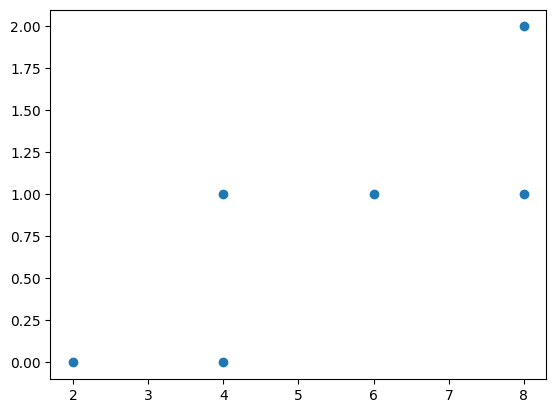

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

E_animals = pd.read_csv("./dataset/dataset_animals.csv")
print(E_animals)
X = E_animals.values
plt.figure()
plt.scatter(X.T[0], X.T[1])
plt.show()

Es gibt mehrere mögliche Clusterings:

  **Individuelle Tierarten**: Das Clusterin `{{x1},{x2},{x3},{x4},{x5},{x6}}` bildet jede einzelne Tierart in einen eigenen Cluster ab. Dies ist eine sehr spezifische Art der Gruppierung, bei der jedes Tier als einzigartig betrachtet wird.

  **Spinnenartige und Vierbeinige Säugetiere**: Das Clustering `{{x1, x2},{x3},{x4, x5},{x6}}` verbindet Skorpione und Spinnen zum Cluster "Spinnenartige" sowie Hausschweine und Schnabeltiere zu "Vierbeinige Säugetiere". Hier werden Tiere aufgrund ihrer ähnlichen Merkmale und Klassifizierungen gruppiert.

  **Gliederfüßer und Säugetiere**: Das Clustering `{{x1, x2, x3},{x4, x5, x6}}` teilt die Daten in "Gliederfüßer" und "Säugetiere" auf. Dies ist eine breitere Kategorisierung, die auf höheren Taxonomieebenen basiert.

Diese *Clusterhierarchie* ist ein wichtiges Analysewerkzeug in der Clusteranalyse, da sie die Zusammenhänge zwischen Clustern auf verschiedenen Ebenen der Granularität illustriert.

#### Hierarchisches Clustering: 

Diese Methode erzeugt eine Hierarchie von Clustern und bietet Einblicke in die Beziehungen zwischen verschieden granularen Clusterings.

  $\Rightarrow$ hilft bei der Bestimmung der optimalen Clusterzahl für die gegebene Anwendung.



Formal ist die Ausgabe einer solchen hierarchischen Clusteringmethode gegeben
durch ein Dendrogramm.

**Dendrogramm**: 

Die Ausgabe einer hierarchischen Clusteringmethode wird formal durch ein Dendrogramm dargestellt.

Sei $E$ ein Datensatz. Ein Dendrogramm $T$ über $E$ ist ein gerichteter Baumdiagramm $T = (V,K,r)$, der die Hierarchie der Cluster in einem Datensatz darstellt, mit Knoten $V$, Kanten $K$ und Wurzel $r \in V$, sodass gilt:
- Für alle $v \in V$, $v \subseteq E$.
- $r = E$:

  Die Wurzel des Baums repräsentiert den gesamten Datensatz. Die Wurzel enthält das gröbste Clustering, bei dem alle Datenpunkte im gleichen Cluster sind.
- Für alle $x \in E$ ist $\{x\}$ ein Blatt von $T$:

  Jedes Blatt repräsentiert einen einzelnen Datenpunkt. Die Blätter des Dendrogramms enthalten das detaillierteste Clustering.
- Jeder innere Knoten $v$ mit Kindern $v_1,..., v_k$ stellt einen Cluster dar, der aus der Vereinigung seiner Untercluster $v_1,..., v_k$ besteht.

- Ein Dendrogramm wird üblicherweise mit Schwellwerten annotiert, die notwendig sind, um Cluster zu vereinigen. Dieses Dendrogramm wird dann als quantitativ bezeichnet. Diese Schwellwerte sind algorithmenabhängig und werden in den folgenden Abschnitten genauer diskutiert. Ein "Schnitt" durch das Dendrogramm an einem bestimmten Schwellwert ergibt ein konkretes Clustering.

Jede Verzweigung im Dendrogramm repräsentiert eine spezifische Gruppierung der Daten in Cluster.

> **Unterschied zwischen einem Baum und einem ungerichteten Baum**:
> - Ein **Baum** ist ein spezieller Typ von Graph, der zusammenhängend ist und keine geschlossenen Pfade enthält. Das bedeutet, es gibt genau einen Pfad zwischen jedem Paar von Knoten.
> - Ein **gerichteter Baum** ist ein gerichteter Graph, der ein ungerichteter Baum ist, wenn man die Richtungen der Kanten ignoriert. Bei vielen Autoren müssen die Richtungen einheitlich von einem Knoten weg oder auf einen Knoten zu orientiert sein¹.

### Python-Funktion `AgglomerativeClustering`


```python
from sklearn.cluster import AgglomerativeClustering

clust = AgglomerativeClustering(n_clusters=None,distance_threshold=0,linkage='average').fit(X)
```
- Die verwendete Funktion `AgglomerativeClustering` führt die agglomeratives hierarchisches Clustering durch. Dies ist eine Methode, bei der jedes Datenobjekt zunächst als einzelner Cluster betrachtet wird und dann, in jedem aufeinanderfolgenden Schritt, die beiden ähnlichsten Cluster zu einem einzigen Cluster zusammengefasst werden.

- `n_clusters=None`: Dies bedeutet, dass die Anzahl der Cluster, die am Ende des Algorithmus übrig bleiben sollen, nicht festgelegt ist. 

- `distance_threshold=0`: Dies legt den Schwellenwert für die Entfernung fest, bei der Cluster zusammengeführt werden sollen¹. In diesem Fall ist der Schwellenwert 0, was bedeutet, dass alle Datenpunkte in einem einzigen Cluster enden werden.

- `linkage='average'`: Dies legt das Verknüpfungskriterium fest, das bestimmt, welche Entfernung zwischen den Mengen von Beobachtungen verwendet wird¹. Die Option 'average' verwendet den Durchschnitt der Entfernungen jeder Beobachtung der beiden Mengen.

- `.fit(X)`: Dieser Befehl führt das Clustering auf dem Datensatz X aus.

Das Ergebnis dieses Befehls ist ein Modell, das die Clusterzugehörigkeiten der Datenpunkte in X kennt.

```python
import numpy as np
from scipy.cluster.hierarchy import dendrogram

plt.figure()
dendrogram(np.column_stack([clust.children_, np.arange(clust.children_.shape[0]), 
                            np.arange(2, clust.children_.shape[0]+2)]).astype(float))
plt.show()
```
Die gegebene Zeile ist ein Befehl in Python, der die Funktion `dendrogram` aus der `scipy.cluster.hierarchy` Bibliothek verwendet, um ein Dendrogramm zu erstellen¹. Hier ist, was jeder Teil des Befehls bedeutet:

- `dendrogram`: Diese Funktion erstellt ein Dendrogramm, das eine Baumstruktur darstellt, die die Hierarchie der Cluster in einem Datensatz zeigt¹.

- `np.column_stack`: Diese Funktion stapelt 1-D Arrays als Spalten in ein 2-D Array.

- `clust.children_`: Dies gibt die Liste der Kinder für jeden nicht-blatt Knoten. Kinder sind Paare von Knoten in den Indizes (n, 2), wobei n der Index des Knotenpaars ist².

- `np.arange(clust.children_.shape[0])`: Dies erzeugt eine Sequenz von Zahlen von 0 bis zur Anzahl der Kinderknoten.

- `np.arange(2, clust.children_.shape[0]+2)`: Dies erzeugt eine Sequenz von Zahlen von 2 bis zur Anzahl der Kinderknoten plus 2.

- `.astype(float)`: Dies konvertiert den Datentyp des resultierenden Arrays in `float`.

Die Zeile könnte auch so geschrieben werden:

```python
children = clust.children_
num_children = children.shape[0]

# Erzeugen der Sequenzen
seq1 = np.arange(num_children)
seq2 = np.arange(2, num_children + 2)

# Stapeln der Sequenzen
stacked_seq = np.column_stack([children, seq1, seq2])

# Konvertieren in float und Erzeugen des Dendrogramms
dendrogram(stacked_seq.astype(float))
```

### Beipiel 2: Fortsetzung von Beispiel 2

Wir versuchen das hierarische Clustering auf den Datensatz `E_animals` anzuwenden.
- Das gröbste Clustering in der Wurzel besteht aus allen Datenpunkten D.h. zu Beginn werden alle Datenpunkte als ein einziger Cluster betrachtet $\{x1, x2, x3\, x4, x5, x6\}$.
  
- das nächst-feinere aus den beiden Clustern $\{x1, x2, x3\}$ und $\{x4, x5, x6\}$. D.h. der ursprüngliche Cluster wird in zwei kleinere Cluster aufgeteilt. Diese kleineren Cluster können aufgrund bestimmter Ähnlichkeiten zwischen den Datenpunkten gebildet werden.
  
- Danach folgt das Clustering $\{\{x3\},\{x1, x2\},\{x6\},\{x4, x5\}\}$
- und schließlich mit $\{\{x1\},\{x2\},\{x3\},\{x4\},\{x5\},\{x6\}\}$ das detaillierteste Clustering.

In [3]:
from sklearn.cluster import AgglomerativeClustering

clust = AgglomerativeClustering(n_clusters=None,distance_threshold=0,linkage='average').fit(X)

In [4]:
# Anzeigen der Cluster-Zuweisungen
labels = clust.labels_
print(labels)

# die Anzahl der Cluster in den Daten
print(clust.n_clusters_)

# Anzeigen der Punkte in jedem Cluster
for i in range(clust.n_clusters_):
    print(f"Cluster {i}:")
    print(X[labels == i])

[5 2 3 4 1 0]
6
Cluster 0:
[[2 0]]
Cluster 1:
[[4 1]]
Cluster 2:
[[8 1]]
Cluster 3:
[[6 1]]
Cluster 4:
[[4 0]]
Cluster 5:
[[8 2]]


Die folgende Abbildung  zeigt ein **quantitatives** Dendrogramm. 

Die Knoten des Dendrogramms sind hier implizit als Schnittpunkte der Verbindungslinien dargestellt und die Elemente aus $E$ sind auf der x-Achse verzeichnet.

Die y-Achse zeigt die Schwellwerte der Distanzen von Knoten, an denen Cluster vereinigt (bzw. getrennt) werden. Näheres dazu in den nächsten beiden Abschnitten.

Schneidet man beispielsweise das Dendrogramm beim Distanzwert 2, so erhält man das Clustering $\{\{x3\},\{x1, x2\},\{x6\},\{x4, x5\}\}$.

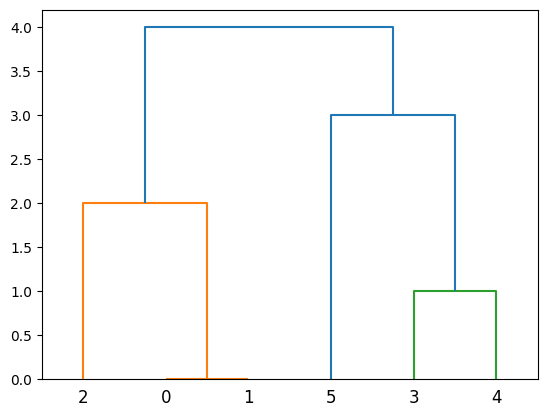

In [5]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram

plt.figure()
dendrogram(np.column_stack([clust.children_, np.arange(clust.children_.shape[0]), 
                            np.arange(2, clust.children_.shape[0]+2)]).astype(float))
plt.show()

Quantitative Dendrogramme ermöglichen es, abhängig von der Interpretation der Distanzfunktion, die Plausibilität von Clusterings verschiedener Hierarchiestufen quantitativ abzuschätzen. 

Aus unserer Abbildung geht beispielsweise hervor, dass es mindestens zwei Cluster $\{x1, x2, x3\}$ und $\{x4, x5, x6\}$ geben sollte. Der Grund dafür ist, dass der Schwellenwert zur Vereinigung dieser beiden Cluster (bei etwa 4.1) relativ groß ist im Vergleich zum Schwellenwert zur Vereinigung der nächst-feineren Cluster (bei etwa 2.1).

#### Methoden des hierarchischen Clusterings:

Methoden des hierarchischen Clusterings lassen sich grundsätzlich in zwei Gruppen einteilen:

- **agglomerative Verfahren** (bzw. bottom-up Verfahren) beginnen die Konstruktion eines Dendrogramms von den Blättern an. Zunächst werden alle Datenpunkte individuell einem Cluster zugewiesen. Anschließend werden iterativ diejenigen Cluster miteinander vereinigt, die am ”ähnlichsten“ sind.
- **divisive Verfahren** (bzw. top-down Verfahren) beginnen die Konstruktion eines Dendrogramms an der Wurzel. Zunächst werden alle Datenpunkte einem einzigen Cluster zugewiesen. Anschließend wird iterativ der aktuelle Knoten in zwei (oder) mehr Cluster
aufgeteilt.

Konkrete Clusteringverfahren dieser beiden Gruppen unterscheiden sich hauptsächlich durch die benutzte Ä hnlichkeits- bzw. Distanzfunktion.

## 3.2.2. Single-Link-Clustering <a name="3_2_2"></a>

[Erklärungsvideo](https://youtu.be/YH0r47m0kFM?si=ENb9_DcqAP69nIK3)

[Erklärungsvideo](https://youtu.be/oNYtYm0tFso?si=KCceCN9txNN5yGzy)

Single-Link-Clustering ist ein agglomeratives Clusteringverfahren. Es funktioniert wie folgt:
- Initial werden alle Datenpunkte des Datensatzes $E$ in einen separaten Cluster gesetzt.
- Anschließend wird iterativ das Paar von Clustern, das am nächsten liegt, zu einem einzigen Cluster zusammengeführt.
Auf diese Weise entsteht bottom-up ein Dendrogramm.

![Single-Link-Clustering](./dataset/single-link-clustering.PNG)

Sei $D$ eine Funktion, die für zwei Mengen von Datenpunkten $E1,E2 \subseteq E$ die *Distanz* $D(E1,E2)$ von $E1$ zu $E2$ berechnet.

Die Menge `X` speichert zu jedem Zeitpunkt die Menge von Clustern, die noch vereinigt werden müssen. Am Ende des Algorithmus enthält `X` dann nur noch die Wurzel des
konstruierten Baumes (Zeile 10). Falls es mehrere Paare von Mengen mit minimalem Abstand in Zeile 7 gibt, wählen wir zufällig ein Paar aus.

Die Distanzfunktion $D_{single}$, die definiert ist durch:
$$D_{\text{single}}(E_1,E_2) = \min_{x_1 \in E_1, x_2 \in E_2} ||x_1 - x_2||$$
Der Abstand zwischen zwei Mengen $E_1$ und $E_2$ ist also der minimale (euklidische) Abstand von beliebigen Datenpunkten aus $E_1$ und $E_2$.

> - Je nach Definition der Distanzfunktion D erhält man ein anderes konkretes Clusteringverfahren. Diese Funktion ist nur für das Single-Link-Clustering.
> - Wie schon zuvor, muss an dieser Stelle darauf geachtet werden, dass die Merkmale entsprechend 
skaliert sind, da ansonsten Unterschiede in den Auspä¨gungen mancher Merkmale sä¨rker gewichtet werden als ader.. Algorithmus 1 geht davon aus, dass der Datensatz E entsprechend vorverarbeite 
wurd
e.

### Beipiel 3: Fortsetzung von Beispiel 2

1. Wir erzeugen zunächst Cluster für alle Datenpunkte aus $E_{animals}$ und setzen $$X := \{\{x1\},\{x2\},\{x3\},\{x4\},\{x5\},\{x6\}\}$$
2. Wir berechnen $D_{single}(X_1,X_2)$ für alle $X_1, X_2 ∈ X$  mit $X_1 ∕= X_2$ (wegen $D_{single}(X_1,X_2) = D_{single}(X_2,X_1)$ müssen wir nicht alle Kombinationen berechnen):
- $D_{\text{single}}(\{x1\},\{x2\}) = ||x1 - x2|| = ||(8,2) - (8,1)|| = \sqrt{0^2 + 1^2} = 1$
- $D_{\text{single}}(\{x1\},\{x3\}) = ||x1 - x3|| = \sqrt{2^2 + 1^2} \approx 2.236$
- $D_{\text{single}}(\{x1\},\{x4\}) = ||x1 - x4|| = \sqrt{4^2 + 2^2} \approx 4.472$
- $D_{\text{single}}(\{x1\},\{x5\}) = ||x1 - x5|| = \sqrt{4^2 + 1^2} \approx 4.123$
- $D_{\text{single}}(\{x1\},\{x6\}) = ||x1 - x6|| = \sqrt{6^2 + 2^2} \approx 6.325$
- $D_{\text{single}}(\{x2\},\{x3\}) = ||x2 - x3|| = \sqrt{2^2 + 0^2} = 2$
- $D_{\text{single}}(\{x2\},\{x4\}) = ||x2 - x4|| = \sqrt{4^2 + 1^2} \approx 4.123$
- $D_{\text{single}}(\{x2\},\{x5\}) = ||x2 - x5|| = \sqrt{4^2 + 0^2} = 4$
- $D_{\text{single}}(\{x2\},\{x6\}) = ||x2 - x6|| = \sqrt{6^2 + 1^2} \approx 6.083$
- $D_{\text{single}}(\{x3\},\{x4\}) = ||x3 - x4|| = \sqrt{2^2 + 1^2} \approx 2.236$
- $D_{\text{single}}(\{x3\},\{x5\}) = ||x3 - x5|| = \sqrt{2^2 + 0^2} = 2$
- $D_{\text{single}}(\{x3\},\{x6\}) = ||x3 - x6|| = \sqrt{4^2 + 1^2} \approx 4.123$
- $D_{\text{single}}(\{x4\},\{x5\}) = ||x4 - x5|| = \sqrt{0^2 + 1^2} = 1$
- $D_{\text{single}}(\{x4\},\{x6\}) = ||x4 - x6|| = \sqrt{2^2 + 0^2} = 2$
- $D_{\text{single}}(\{x5\},\{x6\}) = ||x5 - x6|| = \sqrt{2^2 + 1^2} \approx 2.236$

Es gilt, dass $D_{\text{single}}(\{x1\},\{x2\}) = D_{\text{single}}(\{x4\},\{x5\}) = 1$ minimal ist.

Daher wählen wir zufällig $\{x1\},\{x2\}$ aus und aktualisieren $X$ zu $X := \{\{x1, x2\},\{x3\},\{x4\},\{x5\},\{x6\}\}$.


In [6]:
import numpy as np
import pandas as pd

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def list_euclidean(x_list, x_list_2):
    min_distances = []
    for x1 in x_list:
        for x2 in x_list_2:
            min_distances.append(euclidean_distance(np.array(x1), np.array(x2)))
    return min(min_distances)



In [9]:

def calculate_upper_triangular_distances(df):
    # Initialisiere einen leeren DataFrame, um die Distanzen zu speichern
    distances = pd.DataFrame()

    # Initialisiere eine Variable, um das Paar mit minimaler Distanz zu speichern
    min_distance_pair = None
    min_distance = np.inf

    # Iteriere über jedes Paar von Zeilen im DataFrame
    for i in range(len(df)):
        for j in range(i+1, len(df)):
            # Berechne die euklidische Distanz zwischen den beiden Zeilen
            dist = euclidean_distance(df.iloc[i], df.iloc[j])
            
            # Speichere die Distanz im DataFrame
            distances.loc[df.index[i], df.index[j]] = dist

            # Überprüfe, ob die aktuelle Distanz kleiner ist als die bisher kleinste Distanz
            if dist < min_distance:
                min_distance = dist
                min_distance_pair = (df.iloc[i], df.iloc[j])

    return distances, min_distance_pair

# Teste die Funktion mit dem DataFrame E_animals
print(E_animals)
distance_triangle, mindistance = calculate_upper_triangular_distances(E_animals)
print(distance_triangle)
print(mindistance)


   legs  venom
0     8      2
1     8      1
2     6      1
3     4      0
4     4      1
5     2      0
     1         2         3         4         5
0  1.0  2.236068  4.472136  4.123106  6.324555
1  NaN  2.000000  4.123106  4.000000  6.082763
2  NaN       NaN  2.236068  2.000000  4.123106
3  NaN       NaN       NaN  1.000000  2.000000
4  NaN       NaN       NaN       NaN  2.236068
(legs     8
venom    2
Name: 0, dtype: int64, legs     8
venom    1
Name: 1, dtype: int64)


3. Wir berechnen $D_{\text{single}}(X_1,X_2)$ für alle $X_1,X_2 \in X$ mit $X_1 \neq X_2$:
    - $D_{\text{single}}(\{x_1, x_2\},\{x_3\}) = \min\{|x_1 -x_3|,|x_2 -x_3|\} = 2$
    - $D_{\text{single}}(\{x_1, x_2\},\{x_4\}) = \min\{|x_1 -x_4|,|x_2 -x_4|\} \approx 4.123$
    - $D_{\text{single}}(\{x_1, x_2\},\{x_5\}) = \min\{|x_1 -x_5|,|x_2 -x_5|\} = 4$
    - $D_{\text{single}}(\{x_1, x_2\},\{x_6\}) = \min\{|x_1 -x_6|,|x_2 -x_6|\} \approx 6.083$
    - $D_{\text{single}}(\{x_3\},\{x_4\}) = |x_3 -x_4| \approx 2.236$
    - $D_{\text{single}}(\{x_3\},\{x_5\}) = |x_3 -x_5| = 2$
    - $D_{\text{single}}(\{x_3\},\{x_6\}) = |x_3 -x_6| \approx 4.123$
    - $D_{\text{single}}(\{x_4\},\{x_5\}) = |x_4 -x_5| = 1$
    - $D_{\text{single}}(\{x_4\},\{x_6\}) = |x_4 -x_6| = 2$
    - $D_{\text{single}}(\{x_5\},\{x_6\}) = |x_5 -x_6| \approx 2.236$

In [56]:
print('D_single({x_1, x_2},{x_3}) = ', list_euclidean([E_animals.iloc[0], E_animals.iloc[1]], [E_animals.iloc[2]]))

D_single({x_1, x_2},{x_3}) =  2.0


Es gilt, dass $D_{\text{single}}(\{x_4\},\{x_5\}) = 1$ minimal ist. 

Wir aktualisieren $X$ zu
$$X := \{\{x_1, x_2\},\{x_3\},\{x_4, x_5\},\{x_6\}\}$$

4. Wir berechnen $D_{\text{single}}(X_1,X_2)$ für alle $X_1,X_2 \in X$ mit $X_1 \neq X_2$:
    - $D_{\text{single}}(\{x_1, x_2\},\{x_3\}) = \min\{|x_1 -x_3|,|x_2 -x_3|\} = 2$
    - $D_{\text{single}}(\{x_1, x_2\},\{x_4, x_5\}) = \min\{|x_1 -x_4|,|x_2 -x_4|,|x_1 -x_5|,|x_2 -x_5|\} = 4$
    - $D_{\text{single}}(\{x_1, x_2\},\{x_6\}) = \min\{|x_1 -x_6|,|x_2 -x_6|\} \approx 6.083$
    - $D_{\text{single}}(\{x_3\},\{x_4, x_5\}) = \min\{|x_3 -x_4|,|x_3 -x_5|\} = 2$
    - $D_{\text{single}}(\{x_3\},\{x_6\}) = |x_3 -x_6| \approx 4.123$
    - $D_{\text{single}}(\{x_4, x_5\},\{x_6\}) = \min\{|x_4 -x_6|,|x_5 -x_6|\} = 2$


In [57]:
print('D_single({x_1, x_2},{x_4, x_5}) = ', list_euclidean([E_animals.iloc[0], E_animals.iloc[1]], [E_animals.iloc[3], E_animals.iloc[4]]))

D_single({x_1, x_2},{x_4, x_5}) =  4.0


Hier haben wir drei Paare mit Distanz 2, wir wählen zufällig $\{x_1, x_2\}$ und $\{x_3\}$ und aktualisieren $X$ zu $$X := \{\{x_1, x_2, x_3\},\{x_4, x_5\},\{x_6\}\}$$

Here is the corrected markdown:

5. Wir berechnen $D_{\text{single}}(X_1,X_2)$ für alle $X_1,X_2 \in X$ mit $X_1 \neq X_2$:
- $D_{\text{single}}(\{x_1, x_2, x_3\},\{x_4, x_5\}) = \min\{|x_1 -x_4|,|x_2 -x_4|,|x_3 -x_4|,|x_1 -x_5|,|x_2 -x_5|,|x_3 -x_5|\} = 2$
- $D_{\text{single}}(\{x_1, x_2, x_3\},\{x_6\}) = \min\{|x_1 -x_6|,|x_2 -x_6|,|x_3 -x_6|\} \approx 4.123$
- $D_{\text{single}}(\{x_4, x_5\},\{x_6\}) = \min\{|x_4 -x_6|,|x_5 -x_6|\} = 2$

In [51]:

x_list = [E_animals.iloc[0], E_animals.iloc[1], E_animals.iloc[2]]
x_list_2 = [E_animals.iloc[3], E_animals.iloc[4]]

print(list_euclidean(x_list, x_list_2))
print(list_euclidean(x_list, [E_animals.iloc[5]]))
print(list_euclidean(x_list_2, [E_animals.iloc[5]]))

2.0
4.123105625617661
2.0


Es gilt, dass $$D_{\text{single}}(\{x_1, x_2, x_3\},\{x_4, x_5\}) = D_{\text{single}}(\{x_4, x_5\},\{x_6\}) = 2$$ minimal ist. Wir wählen also zufällig
$\{x_4, x_5\},\{x_6\}$ aus und aktualisieren X zu
$$X := \{\{x_1, x_2, x_3\},\{x_4, x_5, x_6\}\}$$

7. Auch wenn diese Berechnung nicht mehr notwendig ist, da wir nur noch zwei Elemente in X haben, berechnen
wir
$$D_{\text{single}}(\{x_1, x_2, x_3\},\{x_4, x_5, x_6\}) = \min\{|x_1 -x_4|,|x_2 -x_4|,|x_3 -x_4|,|x_1 -x_5|,|x_2 -x_5|,
|x_3 -x_5|,|x_1 -x_6|,|x_2 -x_6|,|x_3 -x_6|\}
= 2$$
und wir aktualisieren X zu
$$X := \{\{x_1, x_2, x_3, x_4, x_5, x_6\}\}$$

In [58]:
print('D_single({x_1, x_2, x_3},{x_4, x_5, x_6}) = ', list_euclidean([E_animals.iloc[0], E_animals.iloc[1], E_animals.iloc[2]], [E_animals.iloc[3], E_animals.iloc[4], E_animals.iloc[5]]))

D_single({x_1, x_2, x_3},{x_4, x_5, x_6}) =  2.0


Damit terminiert der Algorithmus und wir erhalten das folgende qualitative Dendrogramm:

![qualitatives-dendrogramm](./dataset/qualitatives-dendrogramm.PNG)

>Wie man im vorigen Beispiel sieht, liefert das Single-Link-Clustering relativ ”langgezogene“ Cluster und eignet sich daher gut für entsprechend strukturierte Daten.

Die methode `AgglomerativeClustering` verwendet die folgende Distanzfunktion
$$D_{\text{avg}}(E_1,E_2) = \frac{1}{|E_1||E_2|} \sum_{x_1 \in E_1, x_2 \in E_2} |x_1 - x_2|$$
Die Funktion $D_{\text{avg}}$ misst den durchschnittlichen Abstand von Datenpunkten in $E_1$ zu Datenpunkten in $E_2$. Deswegen erhalten wir den quantitativen Dendroggramm von [Abschnitt 3_2_1](#3_2_1). 

In unserem Beispiel haben wir allerdings die Distanzfunktion $D_{\text{single}}$ deshalb erhalten wir den folgenden quantitativen Dendroggramm:

![qualitatives-dendrogramm](./dataset/quantitatives-dendrogramm.PNG)

## 3.2.3. Divisive Analysis Clustering <a name="3_2_3"></a>

[Erklärungsvideo](https://youtu.be/vQEXvV5W7s0?si=sSdBOh1uP0GdEvqy)

Mit DIANA (engl. Divise Analysis Clustering) beginnt man die Konstruktion eines Dendrogramms an der Wurzel mit einem Cluster, der alle Datenpunkte eines gegebenen Datensatzes $E$ enthält, und teilt iterativ solche Blattknoten auf, die noch mehr als einen Datenpunkt enthalten.

Hierbei wird auch eine Distanzfunktion $D$ zur Distanzberechnung von Mengen von Datenpunkten benötigt (wie etwa $D_{\text{single}}$ oder $D_{\text{avg}}$).

Die tatsächliche Entscheidung, wie ein Knoten $X$ mit $X| > 1$ in zwei Cluster aufgeteilt wird, erfolgt wie folgt.
1. Zunächst wird der Knoten $\hat{x}$ aus $X$ gesucht, der am weitesten entfernt von allen anderen Knoten in $X$ is ist.

2. Dann wird initial $X$ aufgeteilt in einen Cluster $X_1$, der nur $\hat{x}$ enthält, und einen Cluster $X_2$, d der alle übrigen Datenpunkte aus $X$ enthält.

3. Anschließend wird der Datenpunkt $x^† \in X_2$ gesucht, der von allen Punkten aus $X_2$ am ehesten noch zu $X_1$ gehören kann.

4. Ist $x^†$ darüber hinaus auch näher an $X_1$ als an $X_2$, so verschieben wir $x^†$ von $X_2$ zu $X_1$.

5. Finden wir keinen Datenpunkt $x \in X_2$, der näher an $X_1$ als am Rest von $X_2$ liegt, so beenden wir die Konstruktion.

6. Und setzen $X_1$ und $X_2$ als neue Kinder von $X$ im Baum ein. 


![DIANA-Clustering](./dataset/Diana-algo.PNG)

### Beipiel 4: Fortsetzung von Beispiel 2
Wir führen Beispiel 2 fort und führen Algorithmus 2 schrittweise mit $D_{\text{avg}}$ durch (beachten Sie, dass wir nur die erste Iteration des Algorithmus zur Verdeutlichung ausführen).

$$D_{\text{avg}}(E_1,E_2) = \frac{1}{|E_1||E_2|} \sum_{x_1 \in E_1, x_2 \in E_2} |x_1 - x_2|$$

Zur Vereinfachung der Darstellung berechnen wir alle paarweisen Distanzen (bzgl. der euklidischen Metrik) von Datenpunkten aus $E_{\text{animals}}$ vor (siehe Beispiel 3 für die Rechnungen), die Ergebnisse sind in der folgenden Tabelle zu sehen. 

In [10]:
distance_triangle, mindistance = calculate_upper_triangular_distances(E_animals)
print(distance_triangle)


     1         2         3         4         5
0  1.0  2.236068  4.472136  4.123106  6.324555
1  NaN  2.000000  4.123106  4.000000  6.082763
2  NaN       NaN  2.236068  2.000000  4.123106
3  NaN       NaN       NaN  1.000000  2.000000
4  NaN       NaN       NaN       NaN  2.236068
(legs     8
venom    2
Name: 0, dtype: int64, legs     8
venom    1
Name: 1, dtype: int64)


1. Wir erzeugen zunächst die Wurzel $X_1$ $$X_1 = {x1, x2, x3, x4, x5, x6}$$

2. Da $|X_1| > 1$ ist, berechnen wir zunächst $\hat{x}$. Dazu bestimmen wir
   
- $D_{\text{avg}}(\{x_1\},\{x_2, x_3, x_4, x_5, x_6\}) = \frac{1+2.236+4.472+4.123+6.325}{5} \approx 3.631$
- $D_{\text{avg}}(\{x_2\},\{x_1, x_3, x_4, x_5, x_6\}) = \frac{1+2+4.123+4+6.083}{5} \approx 3.441$
- $D_{\text{avg}}(\{x_3\},\{x_1, x_2, x_4, x_5, x_6\}) = \frac{2.236+2+2.236+2+4.123}{5} \approx 2.519$
- $D_{\text{avg}}(\{x_4\},\{x_1, x_2, x_3, x_5, x_6\}) = \frac{4.472+4.123+2.236+1+2}{5} \approx 2.766$
- $D_{\text{avg}}(\{x_5\},\{x_1, x_2, x_3, x_4, x_6\}) = \frac{4.123+4+2+1+2.236}{5} \approx 2.672$
- $D_{\text{avg}}(\{x_6\},\{x_1, x_2, x_3, x_4, x_5\}) = \frac{6.325+6.083+4.123+2+2.236}{5} \approx 4.153$

Damit ist $\hat{x} = x_6$ (Weil $x_6$ am weitestens entfernt ist) und wir setzen $X_1 := \{x_6\}$ und $$X_2 := \{x_1, x_2, x_3, x_4, x_5\}$$



3. Wir berechnen $x^†$:
- $D(\{x_1\},\{x_2, x_3, x_4, x_5\})−D(\{x_1\},\{x_6\}) = \frac{1+2.236+4.472+4.123}{4} −6.325 = 2.958−6.325 = −3.367$
- $D(\{x_2\},\{x_1, x_3, x_4, x_5\})−D(\{x_2\},\{x_6\}) = \frac{1+2+4.123+4}{4} −6.083 = 2.781−6.083 = −3.302$
- $D(\{x_3\},\{x_1, x_2, x_4, x_5\})−D(\{x_3\},\{x_6\}) = \frac{2.236+2+2.236+2}{4} −4.123 = 2.118−4.123 = −2.005$
- $D(\{x_4\},\{x_1, x_2, x_3, x_5\})−D(\{x_4\},\{x_6\}) = \frac{4.472+4.123+2.236+1}{4} −2 = 2.958−2 = 0.958$
- $D(\{x_5\},\{x_1, x_2, x_3, x_4\})−D(\{x_5\},\{x_6\}) = \frac{4.123+4+2+1}{4} −2.236 = 2.781−2.236 = 0.545$

Damit ist $x^† = x_4$ und da $D(\{x_4\},\{x_1, x_2, x_3, x_5\}) − D(\{x_4\},\{x_6\}) > 0$, setzen wir $X_1$ und $X_2$:
$$X_1 := \{x_4, x_6\}$$ $$X_2 := \{x_1, x_2, x_3, x_5\}$$ und fahren wir mit der Konstruktion fort.

4. Wir berechnen $x^†$:
- $D(\{x_1\},\{x_2, x_3, x_5\})−D(\{x_1\},\{x_4, x_6\}) = \frac{1+2.236+4.123}{3} − \frac{4.472+6.325}{2} ≈ 2.453−5.399 ≈ −2.946$
- $D(\{x_2\},\{x_1, x_3, x_5\})−D(\{x_2\},\{x_4, x_6\}) = \frac{1+2+4}{3} − \frac{4.123+6.083}{2} ≈ 2.333−5.103 ≈ −2.77$
- $D(\{x_3\},\{x_1, x_2, x_5\})−D(\{x_3\},\{x_4, x_6\}) = \frac{2.236+2+2}{3} − \frac{2.236+4.123}{2} ≈ 2.079−3.18 ≈ −1.101$
- $D(\{x_5\},\{x_1, x_2, x_3\})−D(\{x_5\},\{x_4, x_6\}) ≈ \frac{4.123+4+2}{3} − \frac{1+2.236}{2} ≈ 3.374−1.618 ≈ 1.756$

Damit ist $x^† = x_5$ und da $D(\{x_5\},\{x_1, x_2, x_3\}) − D(\{x_5\},\{x_4, x_6\}) > 0$ setzen wir $X_1$ und $X_2$:
$$X_1 := \{x_4, x_5, x_6\}$$ $$X_2 := \{x_1, x_2, x_3\}$$ und fahren wir mit der Konstruktion fort.


5. Wir berechnen $x^†$:
- $D(\{x_1\},\{x_2, x_3\})−D(\{x_1\},\{x_4, x_5, x_6\}) = \frac{1+2.236}{2} − \frac{4.472+4.123+6.325}{3} ≈ 1.618−4.973 ≈ −3.356$
- $D(\{x_2\},\{x_1, x_3\})−D(\{x_2\},\{x_4, x_5, x_6\}) = \frac{1+2}{2} − \frac{4.123+4+6.083}{3} ≈ 1.5−4.735 ≈ −3.235$
- $D(\{x_3\},\{x_1, x_2\})−D(\{x_3\},\{x_4, x_5, x_6\}) = \frac{2.236+2}{2} − \frac{2.236+2+4.123}{2} ≈ 2.118−2.786 ≈ −0.668$

Damit ist $x^† = x_3$, aber da $$D(\{x_3\},\{x_1, x_2\})−D(\{x_3\},\{x_4, x_5, x_6\}) ≤ 0$$ wird $x^†$ nicht mehr $X_1$ hinzufügt und es bleibt bei $X_1$ und $X_2$:
$$X_1 = \{x_4, x_5, x_6\}$$ $$X_2 = \{x_1, x_2, x_3\}$$. 

Die Knoten $X_1 = \{x_4, x_5, x_6\}$ und $X_2 = \{x_1, x_2, x_3\}$ werden nun als Kinder von $X = \{x_1, x_2, x_3, x_4, x_5, x_6\}$ hinzugefügt und der Algorithmus würde iterativ gesondert mit $X_1$ und $X_2$ fortfahren. Aufgrund der langen Berechnungen führen wir dieses Verfahren allerdings nicht fort. Das finale qualitative Dendrogramm ist identisch mit dem Dendrogramm in Abbildung 2 und das finale quantitative Dendtrogramm ist identisch mit dem Dendrogramm in Abbildung 3. 



## 3.3.3. Zusammenfassung <a name="3_3_3"></a>


   legs  venom
0     8      2
1     8      1
2     6      1
3     4      0
4     4      1
5     2      0


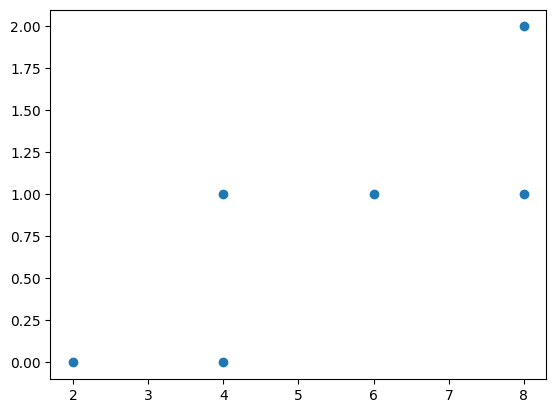

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

E_animals = pd.read_csv("./dataset/dataset_animals.csv")
print(E_animals)
X = E_animals.values
plt.figure()
plt.scatter(X.T[0], X.T[1])
plt.show()

In [3]:
from sklearn.cluster import AgglomerativeClustering

clust = AgglomerativeClustering(n_clusters=None,distance_threshold=0,linkage='average').fit(X)

In [4]:
# Anzeigen der Cluster-Zuweisungen
labels = clust.labels_
print(labels)

# die Anzahl der Cluster in den Daten
print(clust.n_clusters_)

# Anzeigen der Punkte in jedem Cluster
for i in range(clust.n_clusters_):
    print(f"Cluster {i}:")
    print(X[labels == i])

[5 2 3 4 1 0]
6
Cluster 0:
[[2 0]]
Cluster 1:
[[4 1]]
Cluster 2:
[[8 1]]
Cluster 3:
[[6 1]]
Cluster 4:
[[4 0]]
Cluster 5:
[[8 2]]


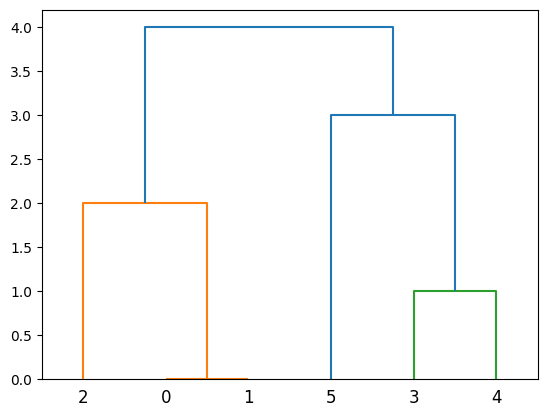

In [5]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram

plt.figure()
dendrogram(np.column_stack([clust.children_, np.arange(clust.children_.shape[0]), 
                            np.arange(2, clust.children_.shape[0]+2)]).astype(float))
plt.show()

In [ ]:
children = clust.children_
num_children = children.shape[0]

# Erzeugen der Sequenzen
seq1 = np.arange(num_children)
seq2 = np.arange(2, num_children + 2)

# Stapeln der Sequenzen
stacked_seq = np.column_stack([children, seq1, seq2])

# Konvertieren in float und Erzeugen des Dendrogramms
dendrogram(stacked_seq.astype(float))

In [ ]:
import numpy as np
import pandas as pd

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def list_euclidean(x_list, x_list_2):
    min_distances = []
    for x1 in x_list:
        for x2 in x_list_2:
            min_distances.append(euclidean_distance(np.array(x1), np.array(x2)))
    return min(min_distances)



In [ ]:

def calculate_upper_triangular_distances(df):
    # Initialisiere einen leeren DataFrame, um die Distanzen zu speichern
    distances = pd.DataFrame()

    # Initialisiere eine Variable, um das Paar mit minimaler Distanz zu speichern
    min_distance_pair = None
    min_distance = np.inf

    # Iteriere über jedes Paar von Zeilen im DataFrame
    for i in range(len(df)):
        for j in range(i+1, len(df)):
            # Berechne die euklidische Distanz zwischen den beiden Zeilen
            dist = euclidean_distance(df.iloc[i], df.iloc[j])
            
            # Speichere die Distanz im DataFrame
            distances.loc[df.index[i], df.index[j]] = dist

            # Überprüfe, ob die aktuelle Distanz kleiner ist als die bisher kleinste Distanz
            if dist < min_distance:
                min_distance = dist
                min_distance_pair = (df.iloc[i], df.iloc[j])

    return distances, min_distance_pair

# Teste die Funktion mit dem DataFrame E_animals
print(E_animals)
distance_triangle, mindistance = calculate_upper_triangular_distances(E_animals)
print(distance_triangle)
print(mindistance)
